## **Opening web camera in Google Colab**

To insert this code in any other program(Notebook)

1. Go to Google Colaboratory

2. Create a new notebook 

3. Click Insert -> Code Snippet

4. Type Camera Capture.

5.  Click insert

6. Run script: Shift + Enter



In [89]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


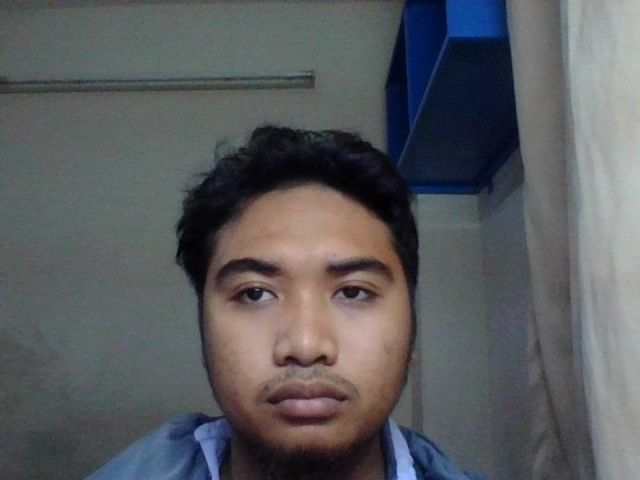

In [90]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

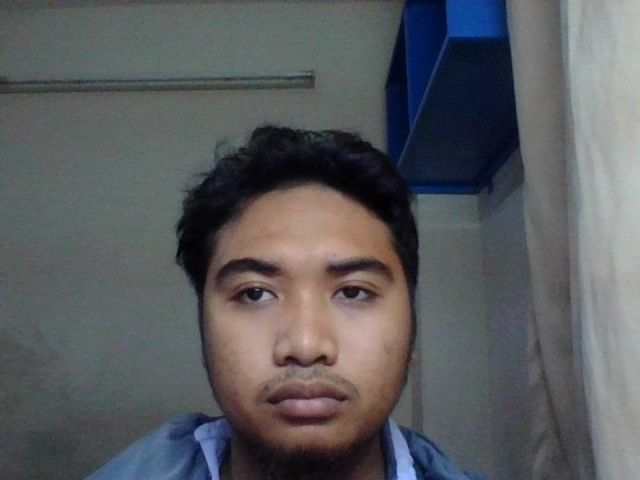

In [91]:
Image(filename)

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [156]:
img = cv2.imread(filename)
gr_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [157]:
imgblur = cv2.GaussianBlur(gr_img,(7,7),0)
# rgb_imgblur = cv2.cvtColor(imgblur, cv2.COLOR_BGR2GRAY)
# rgb_imgblur = cv2.cvtColor(imgblur, cv2.COLOR_RGB2GRAY)

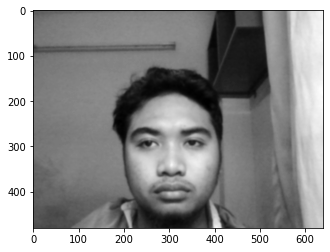

In [95]:
plt.imshow(imgblur,cmap ='gray')

In [160]:
kernel = np.array([[0,-1,0],
                  [-1.2,5,-1.6],
                  [0,-1,0]])

In [97]:
def displayImage(image):
    if len(image.shape)==3:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(color_coverted)
        plt.show()
        
    else:
        plt.imshow(image, cmap="gray")
        plt.show()



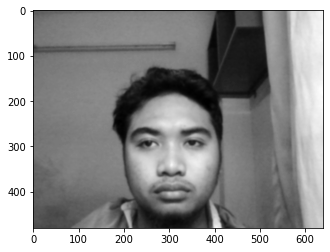

In [98]:
displayImage(imgblur)

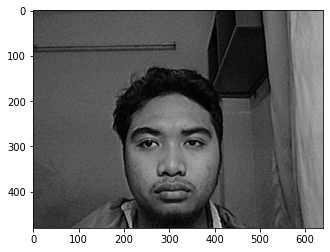

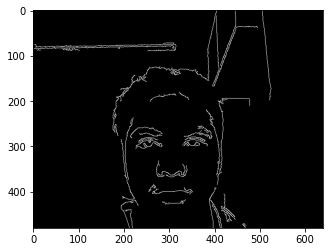

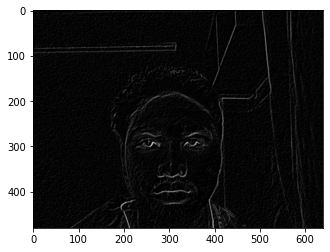

In [163]:
convolvedImg = cv2.filter2D(imgblur, -2,kernel)
# pil_img = Image.fromarray(convolvedImg)
# pil_img.show()
displayImage(convolvedImg)
displayImage(cv2.Canny(convolvedImg,20,70))
sobelx = cv2.Sobel(convolvedImg, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(convolvedImg, cv2.CV_8U,0,1,ksize=3)
imgSobel = sobelx + sobely
displayImage(imgSobel)


In [128]:
face_detect = cv2.CascadeClassifier()
face_detect.load('/content/haarcascade_frontalface_alt.xml')
face_data = face_detect.detectMultiScale(gr_img, 1.3, 5)
face_data


array([[182, 200, 239, 239]], dtype=int32)

In [120]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml


--2022-07-20 12:11:56--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 676709 (661K) [text/plain]
Saving to: ‘haarcascade_frontalface_alt.xml’

haarcascade_frontal 100%[===================>] 660.85K  --.-KB/s    in 0.04s   

2022-07-20 12:11:56 (14.7 MB/s) - ‘haarcascade_frontalface_alt.xml’ saved [676709/676709]



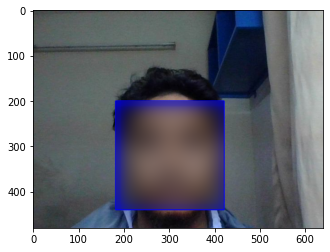

In [146]:

for (x, y, w, h) in face_data:
    c = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi = img[y:y+h, x:x+w]
    # applying a gaussian blur over this new rectangle area
    roi = cv2.GaussianBlur(roi, (23, 23), 30)
    # impose this blurred image on original image to get final image
    img[y:y+roi.shape[0], x:x+roi.shape[1]] = roi

displayImage(img)

In [229]:
img_coins = cv2.imread('/content/download.jpg')
gr_img_coins = cv2.cvtColor(img_coins,cv2.COLOR_BGR2GRAY)

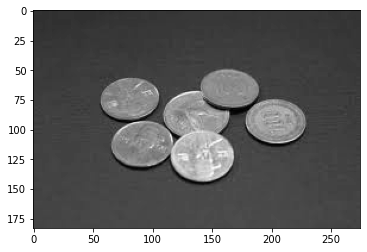

In [230]:
plt.imshow(gr_img_coins,cmap ='gray')

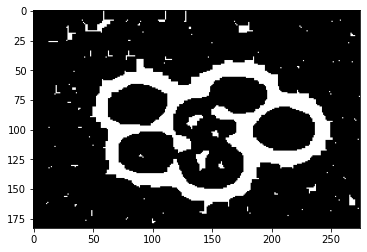

In [235]:
gr_blur = cv2.GaussianBlur(gr_img_coins, (31,31), 0)
thresh = cv2.adaptiveThreshold(gr_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11, 1)
kernel = np.ones((2, 2), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=7)

plt.imshow(closing,cmap ='gray')

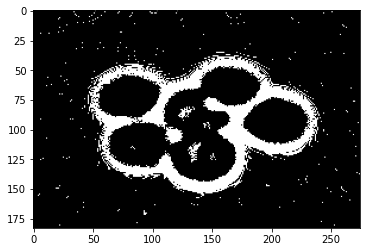

In [236]:
plt.imshow(thresh,cmap ='gray')

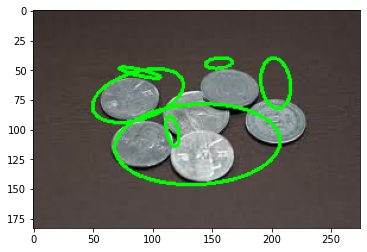

In [239]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area <80 :
        continue
    if len(cnt) <5:
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img_coins, ellipse, (0,255,0), 2)

plt.imshow(img_coins)
